# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

| No. | Student Name | Student ID |
|-----|--------------|------------|
| 1   |  Nguyễn Thanh Danh            |      21280088      |
| 2   |        Y Cao Lâm      |     21280027       |
| 3   |      Trần Mai Chí Tâm        |      21280047      |
| 4   |        Ngô Ngọc Hà Khanh      |    21280019        |

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)

In [6]:
labels = pd.Categorical(labels) #feature engineering

In [7]:
labels

[0, 0, 2, 4, 6, ..., 6, 3, 0, 3, 2]
Length: 35887
Categories (7, int32): [0, 1, 2, 3, 4, 5, 6]

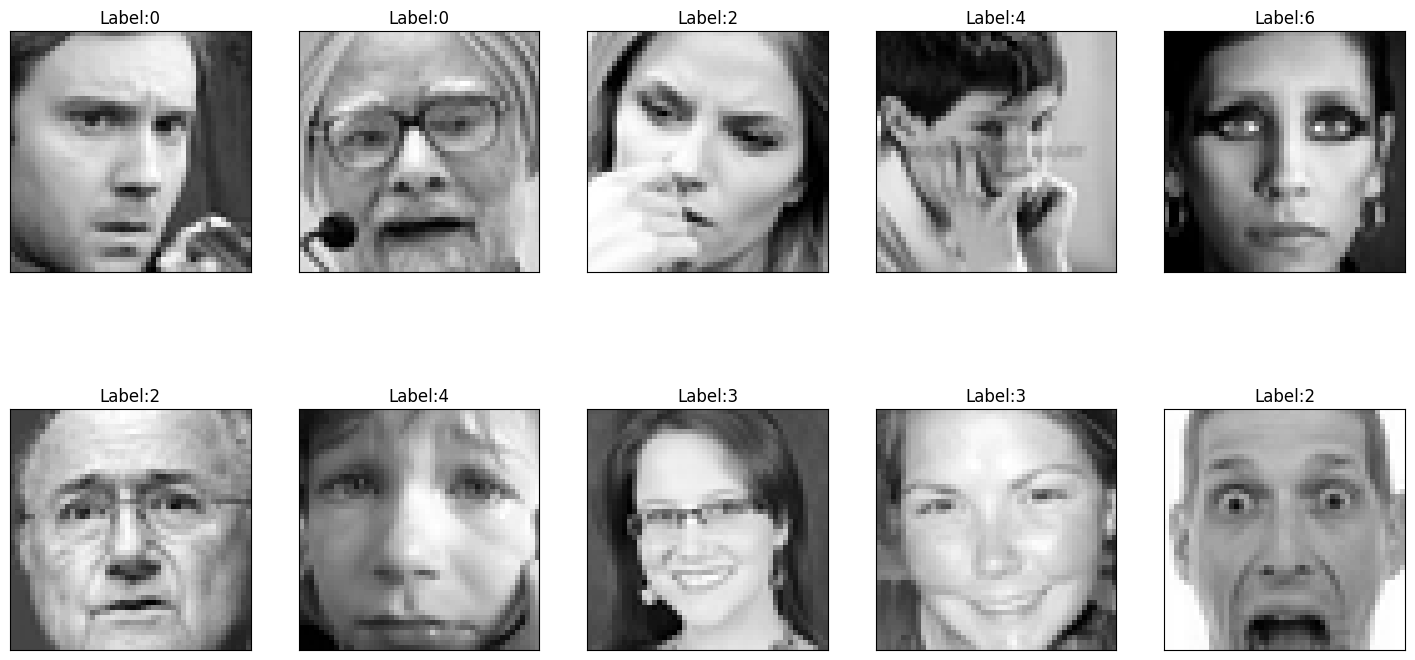

In [8]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [9]:
def tranform_image_array(images):
    matrix = np.zeros(shape=(len(images), 48* 48))
    for i,image in enumerate(images):
        matrix[i] = image.flatten()
    return matrix
data_transf = tranform_image_array(images)
# def tranform_image_col_row(images): 
#     matrix = np.zeros(shape=(len(images), 48 + 48))
#     for i,image in enumerate(images):
#         matrix[i] = np.array([sum(row) for row in image ] + [sum(image[:,col]) for col in range(len(image)) ])
#     return matrix
# data_transf = tranform_image_array(images)
# data_transf2 = tranform_image_col_row(images)

Pca with 2 pcs

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data_transf) ## modify images' array to the appropriate shape

PCA(n_components=2)

In [11]:
sum(pca.explained_variance_ratio_)

0.38728899973733927

In [12]:
## transform for visualizing here
data_pca =pca.transform(data_transf) ## modify images' array to the appropriate shape
data_pca.shape

(35887, 2)

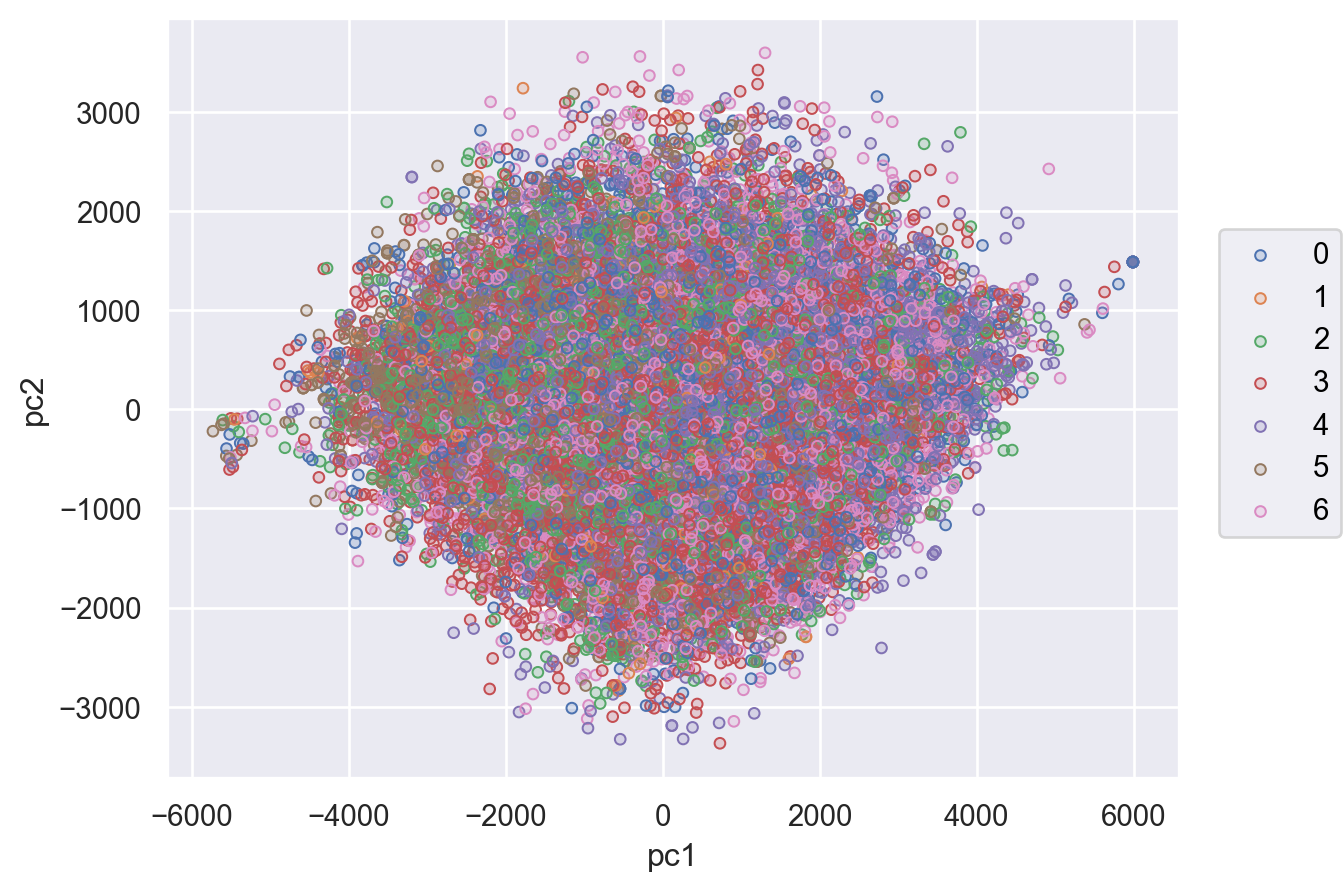

In [13]:
df_pca = pd.DataFrame(data_pca,columns=['pc1','pc2'])
(
    so.Plot(df_pca, x="pc1", y="pc2", color = labels)
    .add(so.Dots())
)

With just 2 components, the amount of variance contained is 39%. Groups can't be separated clearly.  

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

To determine number of pc, we can use cumsum of pca.explained_variance_ :
- Elbow curve: visualize sree plot cumsum, the choise is the elbow point of this plot
- Loop: forward loop until the expected amount of information is reached

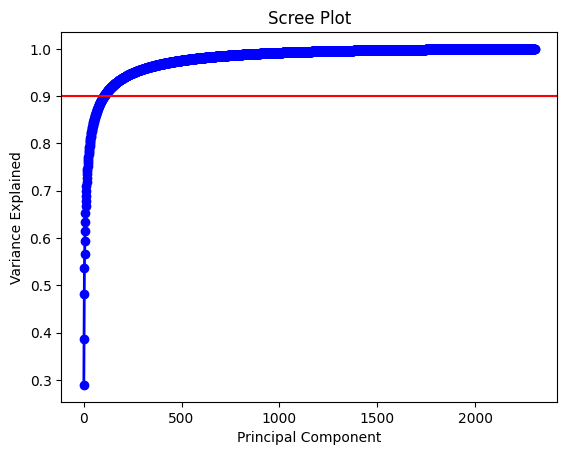

In [15]:
pca = PCA(n_components = 48*48)
pca.fit(data_transf)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.axhline(y= 0.9,color = 'r')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [16]:
evr = np.cumsum(pca.explained_variance_ratio_)
recall_component = 0
for i in range(1, 48*48):
    if evr[i] >= .9:
        recall_component = i
        break
recall_component

103

In [17]:
pca = PCA(n_components = recall_component)
pca.fit(data_transf)

PCA(n_components=103)

In [18]:
transformed_data = pca.transform(data_transf)
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_df.to_csv('../data/transformed_data.csv', index = False)
transformed_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,117.160318,65.308284,43.622072,104.530305,-119.196499,28.432427,-113.429517,-12.240222,-47.007765,-52.987894
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,124.778257,-105.972115,-53.829235,-37.884504,-20.923992,1.289340,28.149294,-68.245978,44.697856,-92.699867
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-72.187350,70.657810,8.078529,61.468933,-120.272230,-116.895018,-37.888712,-113.226480,-94.965283,-33.857668
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,-75.414274,33.188957,-23.305738,26.814882,42.314511,148.915870,-49.909448,83.597764,-62.657711,92.308999
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,33.866364,-38.039759,-30.819500,-10.307120,80.223450,-81.206807,9.098827,-90.770475,53.339376,-25.132326


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

We will deploy 3 machine learning models and 1 MLP models
- Logistic Regression, SVM and MLP, using the PyTorch framework
- Gaussian Naive Bayes model using scikit-learn.


*Note: PyTorch will be used for Logistic Regression and SVM, while scikit-learn will be used for Gaussian Naive Bayes.*


To perform the tuning process to find the hyperparameters, including batch-size and some specific parameters, for models using the PyTorch framework.

### 3.1 Original Data

#### Feature Engineering

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df['pixels'] = df['pixels'].apply(lambda x: list(map(int, x.split())))

num_features = len(df['pixels'][0])
assert all(len(pixels) == num_features for pixels in df['pixels'])

X = np.array(df['pixels'].tolist())
y = np.array(df['emotion'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### Data Loader

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

In [22]:
from torch.utils.data import DataLoader, Dataset

In [23]:
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [24]:
train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### 3.1.1 Logistic Regression

#### Define the logistic regression model

In [25]:
accuracy_logistic = 0
roc_auc_dict_logistic = {}
classification_re_logistic = ''
confusion_logistic = ''

from sklearn.metrics import roc_auc_score
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict


class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)


def train_and_evaluate(num_epochs, train_loader, test_loader, model, criterion, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f} || '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    # Evaluate on test data
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    global accuracy_logistic, roc_auc_dict_logistic, classification_re_logistic, confusion_logistic
    roc_auc_dict_logistic = roc_auc_score_multiclass(y_true, y_pred)
    accuracy_logistic = accuracy_score(y_true, y_pred)
    classification_re_logistic = classification_report(y_true, y_pred)
    confusion_logistic = confusion_matrix(y_true, y_pred)
    print("\nLogistic Regression")
    print("Accuracy:", accuracy_logistic)
    print("Classification Report:\n", classification_re_logistic)
    print("AUC score (One vs All):", roc_auc_dict_logistic)
    print("Confusion Matrix:\n", confusion_logistic)

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Hyperparameter Tuning

In [26]:
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy_logistic = 0
best_params = None
num_epochs = 5
for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    # Create model
    input_dim = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    #num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.numpy())
                all_labels.extend(y_batch.numpy())
        accuracy = accuracy_score(all_labels, all_preds)
        
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy_logistic:
        best_accuracy_logistic = accuracy
        best_params = params

Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3624
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3327
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3470
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2576
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'SGD'}
Test Accuracy: 0.2398
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'Adam'}
Test Accuracy: 0.2073
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3644
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3180
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3351
Testing params: 

Best params of logistic: 

In [27]:
print(f'Best Accuracy: {best_accuracy_logistic:.4f} with params: {best_params}')

Best Accuracy: 0.3644 with params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}


#### Instantiate the model

In [28]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

Epoch [1/20], Train Loss: 1.8599, Train Accuracy: 0.2725 || Val Loss: 1.7896, Val Accuracy: 0.3319
Epoch [2/20], Train Loss: 1.7647, Train Accuracy: 0.3413 || Val Loss: 1.7561, Val Accuracy: 0.3457
Epoch [3/20], Train Loss: 1.7349, Train Accuracy: 0.3567 || Val Loss: 1.7431, Val Accuracy: 0.3510
Epoch [4/20], Train Loss: 1.7155, Train Accuracy: 0.3644 || Val Loss: 1.7330, Val Accuracy: 0.3562
Epoch [5/20], Train Loss: 1.7016, Train Accuracy: 0.3679 || Val Loss: 1.7229, Val Accuracy: 0.3614
Epoch [6/20], Train Loss: 1.6900, Train Accuracy: 0.3743 || Val Loss: 1.7121, Val Accuracy: 0.3663
Epoch [7/20], Train Loss: 1.6805, Train Accuracy: 0.3771 || Val Loss: 1.7063, Val Accuracy: 0.3666
Epoch [8/20], Train Loss: 1.6715, Train Accuracy: 0.3807 || Val Loss: 1.6988, Val Accuracy: 0.3726
Epoch [9/20], Train Loss: 1.6639, Train Accuracy: 0.3822 || Val Loss: 1.6969, Val Accuracy: 0.3674
Epoch [10/20], Train Loss: 1.6569, Train Accuracy: 0.3827 || Val Loss: 1.6943, Val Accuracy: 0.3681
Epoch [11

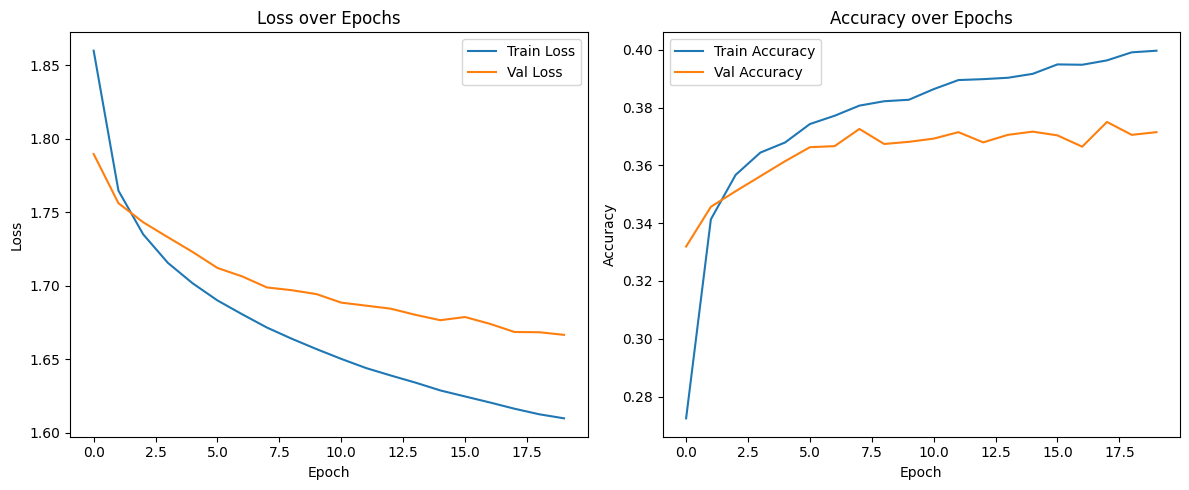

In [29]:
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

### 3.1.2 SVM

#### Define the SVM model

In [30]:
class SVMModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SVMModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)

def hinge_loss(outputs, targets):
    targets_one_hot = torch.eye(outputs.size(1))[targets].to(outputs.device)
    hinge_loss_value = torch.mean(torch.clamp(1 - targets_one_hot * outputs, min=0))
    return hinge_loss_value

In [31]:
accuracy_svm = 0
roc_auc_dict_svm = {}
classification_re_svm = ''
confusion_svm = ''

def train_and_evaluate_svm(num_epochs, train_loader, test_loader, model, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = hinge_loss(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Evaluate on test data
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()
    global accuracy_svm, roc_auc_dict_svm, classification_re_svm, confusion_svm
    roc_auc_dict_svm = roc_auc_score_multiclass(y_true, y_pred)
    accuracy_svm = accuracy_score(y_true, y_pred)
    classification_re_svm = classification_report(y_true, y_pred)
    confusion_svm = confusion_matrix(y_true, y_pred)
    print("\nSVM")
    print("Accuracy:", accuracy_svm)
    print("Classification Report:\n", classification_re_svm)
    print("AUC score (One vs All):", roc_auc_dict_svm)
    print("Confusion Matrix:\n", confusion_svm)

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Hyperparameter Tuning

In [32]:
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    model = SVMModel(input_dim=input_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3031
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2143
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3221
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.1917
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3031
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2598
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3213
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.1813
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2660
Testing params

Best params of SVM:

In [33]:
print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Best Accuracy: 0.3282 with params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}


#### Instantiate the model

Epoch [1/20], Loss: 0.9633, Accuracy: 0.2595, Val Loss: 0.9492, Val Accuracy: 0.3026
Epoch [2/20], Loss: 0.9422, Accuracy: 0.3164, Val Loss: 0.9376, Val Accuracy: 0.3260
Epoch [3/20], Loss: 0.9329, Accuracy: 0.3269, Val Loss: 0.9313, Val Accuracy: 0.3236
Epoch [4/20], Loss: 0.9260, Accuracy: 0.3324, Val Loss: 0.9251, Val Accuracy: 0.3364
Epoch [5/20], Loss: 0.9201, Accuracy: 0.3368, Val Loss: 0.9203, Val Accuracy: 0.3308
Epoch [6/20], Loss: 0.9150, Accuracy: 0.3362, Val Loss: 0.9158, Val Accuracy: 0.3310
Epoch [7/20], Loss: 0.9104, Accuracy: 0.3393, Val Loss: 0.9116, Val Accuracy: 0.3267
Epoch [8/20], Loss: 0.9062, Accuracy: 0.3387, Val Loss: 0.9084, Val Accuracy: 0.3297
Epoch [9/20], Loss: 0.9024, Accuracy: 0.3435, Val Loss: 0.9042, Val Accuracy: 0.3308
Epoch [10/20], Loss: 0.8988, Accuracy: 0.3402, Val Loss: 0.9011, Val Accuracy: 0.3327
Epoch [11/20], Loss: 0.8956, Accuracy: 0.3429, Val Loss: 0.8978, Val Accuracy: 0.3314
Epoch [12/20], Loss: 0.8925, Accuracy: 0.3414, Val Loss: 0.8952

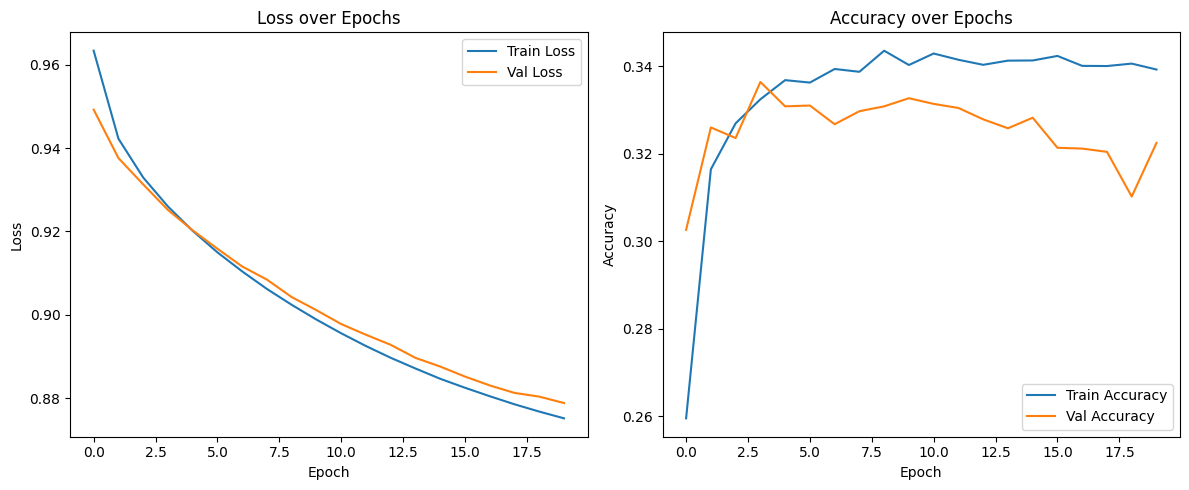

In [34]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = SVMModel(input_dim=input_dim, num_classes=num_classes)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=.01)

train_and_evaluate_svm(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, optimizer=optimizer)

### 3.1.3 Gaussian Naive Bayes

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

#### Define the Gaussian Naive Bayes model

In [36]:
gnb = GaussianNB()

#### Hyperparameter Tuning

In [37]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=50),  # Range of values for var_smoothing
    'priors': [None, [0.3, 0.4], [0.2, 0.5]]  # Prior probabilities for the classes
}

In [38]:
#GridSearchCV
gnb_best = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

#### Instantiate the model

In [39]:
gnb_best.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4], [0.2, 0.5]],
                         'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-0...
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [40]:
# import joblib

# print(f'Best parameters: {gnb_best.best_params_}')
# print(f'Best cross-validation accuracy: {gnb_best.best_score_:.4f}')

# joblib_file = "gnb_best_model.pkl"
# joblib.dump(gnb_best.best_estimator_, joblib_file)

In [41]:
y_pred = gnb_best.predict(X_test)

In [42]:
accuracy_gnb = accuracy_score(y_test, y_pred)
classification_re_gnb = classification_report(y_test, y_pred)
roc_auc_dict_gnb = roc_auc_score_multiclass(y_true, y_pred)
confusion_gnb = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy_gnb:.4f}')
print('Classification Report:\n', classification_re_gnb)
print("AUC score (One vs All):\n", roc_auc_dict_gnb)
print("Confusion Matrix:\n", confusion_gnb)

Accuracy: 0.2190
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.07      0.11       734
           1       0.02      0.20      0.04        80
           2       0.24      0.06      0.09       762
           3       0.41      0.14      0.21      1335
           4       0.24      0.39      0.30       906
           5       0.21      0.60      0.31       603
           6       0.28      0.17      0.21       964

    accuracy                           0.22      5384
   macro avg       0.23      0.23      0.18      5384
weighted avg       0.28      0.22      0.20      5384

AUC score (One vs All):
 {0: 0.5187556766575839, 1: 0.5333521870286576, 2: 0.5131784424826603, 3: 0.5369550719047473, 4: 0.5723054185929346, 5: 0.6540666950404501, 6: 0.5357024839939167}
Confusion Matrix:
 [[ 52  99  28  52 236 207  60]
 [  2  16   0   7  13  35   7]
 [ 32  87  43  51 187 302  60]
 [ 47 197  34 190 313 405 149]
 [ 29 133  39  59 356 198  92]
 

### 3.1.4 MLP

#### Define the MLP model

Create Basic MLP Model

- Fully connected layer (fc1_input, fc2_output)
- Rectified Linear Unit  (relu)

In [43]:
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [44]:
accuracy_mlp = 0
roc_auc_dict_mlp = {}
classification_re_mlp = ''
confusion_mlp = ''
def train_and_evaluate_mlp(num_epochs, train_loader, test_loader, model, criterion, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f} || '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    # Evaluate on test data
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    global accuracy_mlp, roc_auc_dict_mlp, classification_re_mlp, confusion_mlp
    roc_auc_dict_mlp = roc_auc_score_multiclass(y_true, y_pred)
    accuracy_mlp = accuracy_score(y_true, y_pred)
    classification_re_mlp = classification_report(y_true, y_pred)
    confusion_mlp = confusion_matrix(y_true, y_pred)
    print("\nMLP")
    print("Accuracy:", accuracy_mlp)
    print("Classification Report:\n", classification_re_mlp)
    print("AUC score (One vs All):", roc_auc_dict_mlp)
    print("Confusion Matrix:\n", confusion_mlp)

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Hyperparameter Tuning

In [45]:
criterion = nn.CrossEntropyLoss()
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'hidden_dim': [32, 64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    hidden_dim = params['hidden_dim']
    model = MLPModel(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3717
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3692
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.4019
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2779
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3570
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3213
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3834
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Te

Best Params of Deeplearning Model (MLP):

In [46]:
print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Best Accuracy: 0.4081 with params: {'batch_size': 32, 'hidden_dim': 128, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}


#### Instantiate the model

In [47]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = MLPModel(input_dim=input_dim, hidden_dim=64, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

Epoch [1/20], Train Loss: 1.6910, Train Accuracy: 0.3393 || Val Loss: 1.6269, Val Accuracy: 0.3666
Epoch [2/20], Train Loss: 1.5791, Train Accuracy: 0.3902 || Val Loss: 1.5774, Val Accuracy: 0.3938
Epoch [3/20], Train Loss: 1.5345, Train Accuracy: 0.4121 || Val Loss: 1.5595, Val Accuracy: 0.4027
Epoch [4/20], Train Loss: 1.5014, Train Accuracy: 0.4251 || Val Loss: 1.5429, Val Accuracy: 0.4071
Epoch [5/20], Train Loss: 1.4743, Train Accuracy: 0.4369 || Val Loss: 1.5297, Val Accuracy: 0.4118
Epoch [6/20], Train Loss: 1.4518, Train Accuracy: 0.4477 || Val Loss: 1.5221, Val Accuracy: 0.4140
Epoch [7/20], Train Loss: 1.4322, Train Accuracy: 0.4549 || Val Loss: 1.5279, Val Accuracy: 0.4147
Epoch [8/20], Train Loss: 1.4149, Train Accuracy: 0.4652 || Val Loss: 1.5189, Val Accuracy: 0.4270
Epoch [9/20], Train Loss: 1.3972, Train Accuracy: 0.4711 || Val Loss: 1.5086, Val Accuracy: 0.4251
Epoch [10/20], Train Loss: 1.3815, Train Accuracy: 0.4781 || Val Loss: 1.5300, Val Accuracy: 0.4108
Epoch [11

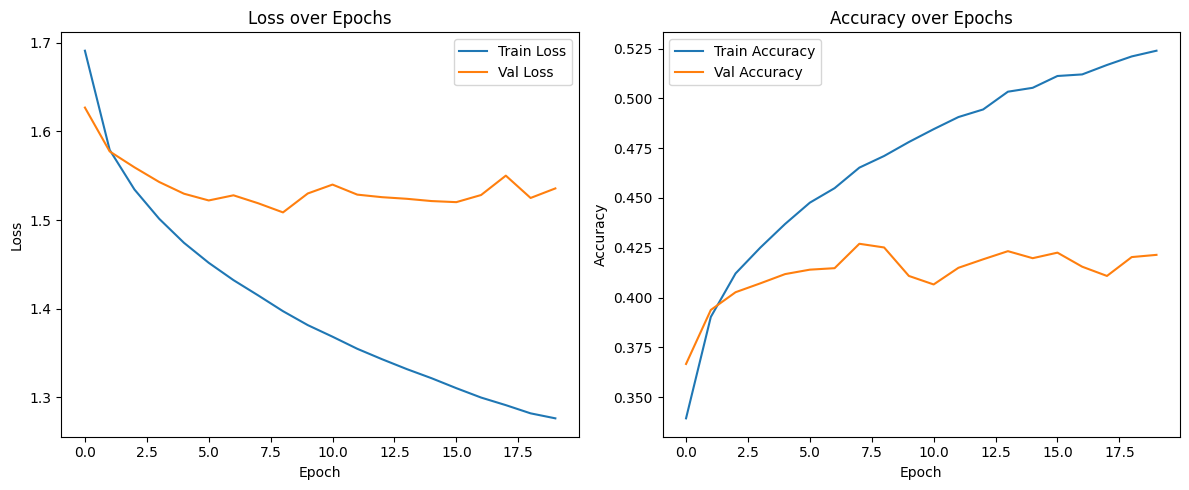

In [48]:
train_and_evaluate_mlp(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

In [49]:
#logistic
original_logistic_accuracy = accuracy_logistic
original_logistic_roc = roc_auc_dict_logistic
original_logistic_classre = classification_re_logistic
original_logistic_confusion = confusion_logistic
#svm
original_svm_accuracy = accuracy_svm
original_svm_roc = roc_auc_dict_svm
original_svm_classre = classification_re_svm
original_svm_confusion = confusion_svm
#gnb
original_gnb_accuracy = accuracy_gnb
original_gnb_roc = roc_auc_dict_gnb
original_gnb_classre = classification_re_gnb
original_gnb_confusion = confusion_gnb
#mlp
original_mlp_accuracy = accuracy_mlp
original_mlp_roc = roc_auc_dict_mlp
original_mlp_classre = classification_re_mlp
original_mlp_confusion = confusion_mlp

### 3.2 Transformed Data

#### Feature Engineering || Data Loader

In [50]:
labels

[0, 0, 2, 4, 6, ..., 6, 3, 0, 3, 2]
Length: 35887
Categories (7, int32): [0, 1, 2, 3, 4, 5, 6]

In [51]:
transformed_data

array([[ 6.91750859e+02, -4.42328649e+02, -8.64125553e+02, ...,
        -1.22402224e+01, -4.70077652e+01, -5.29878940e+01],
       [-6.20254893e+01,  5.61762207e+02,  5.65149735e+02, ...,
        -6.82459775e+01,  4.46978562e+01, -9.26998674e+01],
       [-1.32253807e+03, -4.15729686e+02, -1.93081348e+03, ...,
        -1.13226480e+02, -9.49652833e+01, -3.38576681e+01],
       ...,
       [-1.28915565e+03, -1.40856832e+03,  4.11251518e+02, ...,
        -6.50525635e+01,  1.86762242e+01, -5.29844793e+01],
       [ 2.00841357e+03, -1.25610909e+02, -5.02706081e+02, ...,
         1.94713459e+01, -9.20123337e+01,  5.74312854e+01],
       [-2.10239027e+02, -4.86569097e+02, -5.81471770e+02, ...,
         4.80754356e+01,  4.97785034e-01, -3.24468778e+00]])

In [52]:
### split
X_train, X_temp, y_train, y_temp = train_test_split(transformed_data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:
train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [55]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1c0c0cd71a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1c0c0cfc9e0>)

We will use models was built and implement hyperparameter tuning again with transformed data

### 3.2.1 Logistic Regression

#### Hyperparameter Tuning

In [56]:
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    # Create model
    input_dim = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    #num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.numpy())
                all_labels.extend(y_batch.numpy())
        accuracy = accuracy_score(all_labels, all_preds)
        
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2552
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3696
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3715
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.3434
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'SGD'}
Test Accuracy: 0.3629
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'Adam'}
Test Accuracy: 0.2682
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2567
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3678
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3657
Testing params: 

Best params of logistic:

In [57]:
print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Best Accuracy: 0.3715 with params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}


#### Instantiate the model

In [58]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

Epoch [1/20], Train Loss: 1.8414, Train Accuracy: 0.2837 || Val Loss: 1.7130, Val Accuracy: 0.3640
Epoch [2/20], Train Loss: 1.6760, Train Accuracy: 0.3733 || Val Loss: 1.6646, Val Accuracy: 0.3707
Epoch [3/20], Train Loss: 1.6459, Train Accuracy: 0.3778 || Val Loss: 1.6501, Val Accuracy: 0.3691
Epoch [4/20], Train Loss: 1.6349, Train Accuracy: 0.3791 || Val Loss: 1.6412, Val Accuracy: 0.3692
Epoch [5/20], Train Loss: 1.6292, Train Accuracy: 0.3777 || Val Loss: 1.6370, Val Accuracy: 0.3711
Epoch [6/20], Train Loss: 1.6269, Train Accuracy: 0.3771 || Val Loss: 1.6356, Val Accuracy: 0.3705
Epoch [7/20], Train Loss: 1.6249, Train Accuracy: 0.3785 || Val Loss: 1.6335, Val Accuracy: 0.3715
Epoch [8/20], Train Loss: 1.6235, Train Accuracy: 0.3787 || Val Loss: 1.6336, Val Accuracy: 0.3674
Epoch [9/20], Train Loss: 1.6226, Train Accuracy: 0.3783 || Val Loss: 1.6336, Val Accuracy: 0.3705
Epoch [10/20], Train Loss: 1.6225, Train Accuracy: 0.3770 || Val Loss: 1.6332, Val Accuracy: 0.3726
Epoch [11

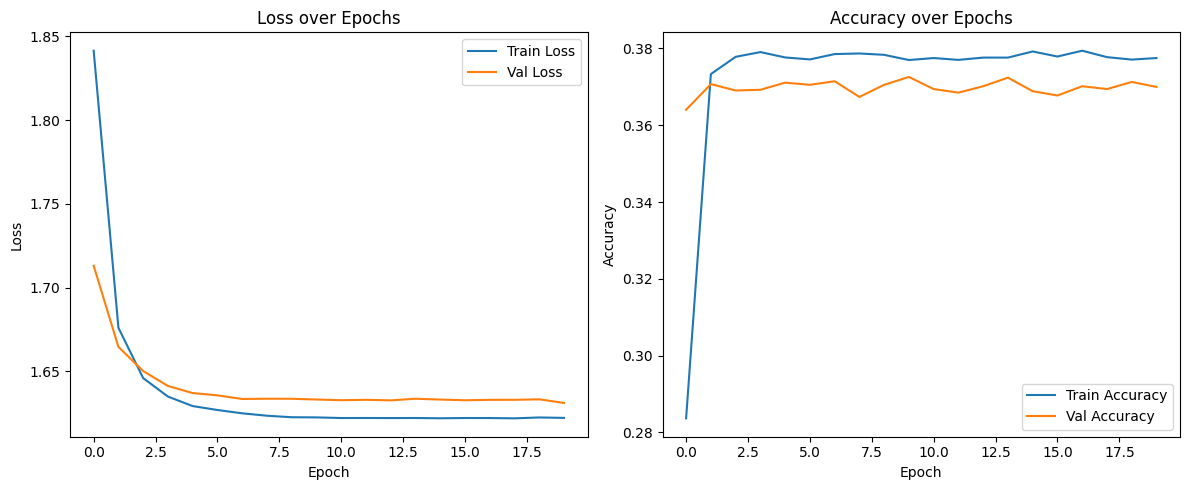

In [59]:
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

### 3.2.2 SVM Model

#### Hyperparameter Tuning

In [60]:
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    model = SVMModel(input_dim=input_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1712
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2940
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3197
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2604
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1595
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3605
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3655
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2949
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1644
Testing params

Best params of SVM: 

In [61]:
print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Best Accuracy: 0.3655 with params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}


#### Instantiate the model

Epoch [1/20], Loss: 0.9853, Accuracy: 0.1834, Val Loss: 0.9735, Val Accuracy: 0.2312
Epoch [2/20], Loss: 0.9668, Accuracy: 0.2822, Val Loss: 0.9619, Val Accuracy: 0.3232
Epoch [3/20], Loss: 0.9584, Accuracy: 0.3508, Val Loss: 0.9566, Val Accuracy: 0.3535
Epoch [4/20], Loss: 0.9547, Accuracy: 0.3676, Val Loss: 0.9542, Val Accuracy: 0.3635
Epoch [5/20], Loss: 0.9531, Accuracy: 0.3719, Val Loss: 0.9532, Val Accuracy: 0.3626
Epoch [6/20], Loss: 0.9524, Accuracy: 0.3730, Val Loss: 0.9528, Val Accuracy: 0.3640
Epoch [7/20], Loss: 0.9521, Accuracy: 0.3738, Val Loss: 0.9526, Val Accuracy: 0.3631
Epoch [8/20], Loss: 0.9520, Accuracy: 0.3734, Val Loss: 0.9525, Val Accuracy: 0.3652
Epoch [9/20], Loss: 0.9518, Accuracy: 0.3748, Val Loss: 0.9525, Val Accuracy: 0.3657
Epoch [10/20], Loss: 0.9519, Accuracy: 0.3734, Val Loss: 0.9525, Val Accuracy: 0.3639
Epoch [11/20], Loss: 0.9519, Accuracy: 0.3747, Val Loss: 0.9524, Val Accuracy: 0.3663
Epoch [12/20], Loss: 0.9519, Accuracy: 0.3736, Val Loss: 0.9524

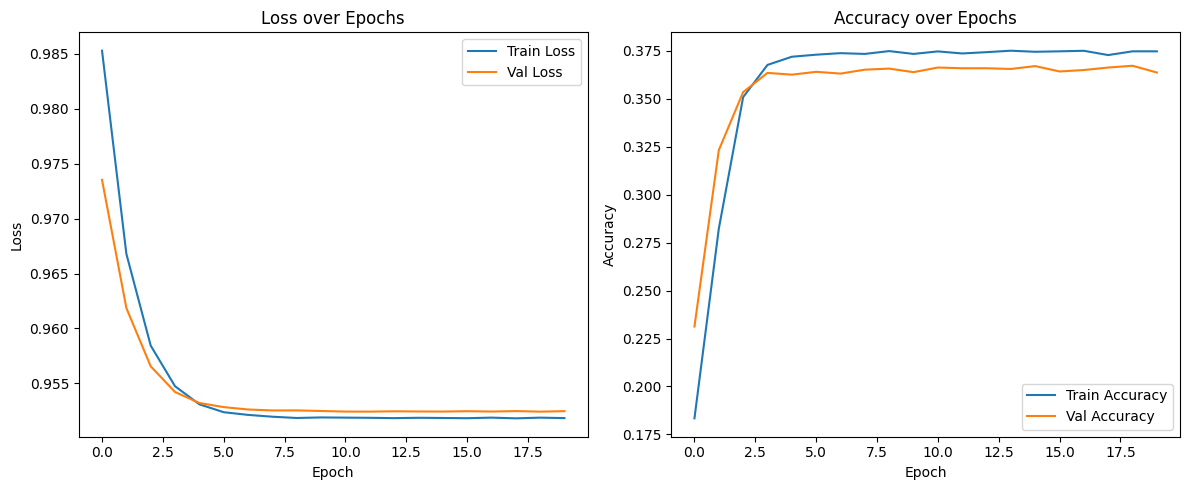

In [62]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = SVMModel(input_dim=input_dim, num_classes=num_classes)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=.1)

train_and_evaluate_svm(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, optimizer=optimizer)

### 3.2.3 Gaussian Naive Bayes

#### Define the Gaussian Naive Bayes Model

In [63]:
gnb_transf = GaussianNB()

#### Hyperparameter Tuning

In [64]:
#GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=50),  # Range of values for var_smoothing
    'priors': [None, [0.3, 0.4], [0.2, 0.5]]  # Prior probabilities for the classes
}
gnb_best_ = GridSearchCV(estimator=gnb_transf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

#### Instantiate the model

In [65]:
gnb_best_.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4], [0.2, 0.5]],
                         'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-0...
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [66]:
y_pred = gnb_best_.predict(X_test)

In [67]:
accuracy_gnb = accuracy_score(y_test, y_pred)
classification_re_gnb = classification_report(y_test, y_pred)
roc_auc_dict_gnb = roc_auc_score_multiclass(y_true, y_pred)

print(f'Accuracy: {accuracy_gnb:.4f}')
print('Classification Report:\n', classification_re_gnb)
print("AUC score (One vs All):\n", roc_auc_dict_gnb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3171
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.11      0.16       734
           1       0.06      0.23      0.09        80
           2       0.23      0.10      0.14       762
           3       0.34      0.74      0.47      1335
           4       0.27      0.14      0.18       906
           5       0.48      0.28      0.35       603
           6       0.32      0.27      0.29       964

    accuracy                           0.32      5384
   macro avg       0.29      0.26      0.24      5384
weighted avg       0.32      0.32      0.28      5384

AUC score (One vs All):
 {0: 0.535356127860303, 1: 0.5850678733031675, 2: 0.5224996621203396, 3: 0.6353912696804962, 4: 0.532131332282328, 5: 0.6186114328309648, 6: 0.5712608662999193}
Confusion Matrix:
 [[ 80  45  41 357  64  37 110]
 [  5  18   3  34   3   8   9]
 [ 34  42  76 357  76  61 116]
 [ 44  46  65 983  91  25  81]
 [ 44  52  63 452 126  18 151]
 [ 

### 3.2.4 MLP Model

#### Hyperparameter Tuning

In [68]:
criterion = nn.CrossEntropyLoss()
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'hidden_dim': [32, 64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    hidden_dim = params['hidden_dim']
    model = MLPModel(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2556
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.4001
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3694
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.3484
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2533
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2621
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.2480
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Te

Best params of MLP:

In [69]:
print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Best Accuracy: 0.4027 with params: {'batch_size': 64, 'hidden_dim': 128, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}


#### Instantiate the model

Epoch [1/20], Train Loss: 1.6820, Train Accuracy: 0.3429 || Val Loss: 1.6175, Val Accuracy: 0.3815
Epoch [2/20], Train Loss: 1.5881, Train Accuracy: 0.3888 || Val Loss: 1.5988, Val Accuracy: 0.3828
Epoch [3/20], Train Loss: 1.5652, Train Accuracy: 0.4006 || Val Loss: 1.5782, Val Accuracy: 0.3895
Epoch [4/20], Train Loss: 1.5464, Train Accuracy: 0.4084 || Val Loss: 1.5682, Val Accuracy: 0.3934
Epoch [5/20], Train Loss: 1.5306, Train Accuracy: 0.4176 || Val Loss: 1.5583, Val Accuracy: 0.4023
Epoch [6/20], Train Loss: 1.5193, Train Accuracy: 0.4217 || Val Loss: 1.5573, Val Accuracy: 0.4055
Epoch [7/20], Train Loss: 1.5104, Train Accuracy: 0.4225 || Val Loss: 1.5459, Val Accuracy: 0.4069
Epoch [8/20], Train Loss: 1.5023, Train Accuracy: 0.4266 || Val Loss: 1.5457, Val Accuracy: 0.4017
Epoch [9/20], Train Loss: 1.4952, Train Accuracy: 0.4307 || Val Loss: 1.5439, Val Accuracy: 0.4060
Epoch [10/20], Train Loss: 1.4911, Train Accuracy: 0.4345 || Val Loss: 1.5406, Val Accuracy: 0.4068
Epoch [11

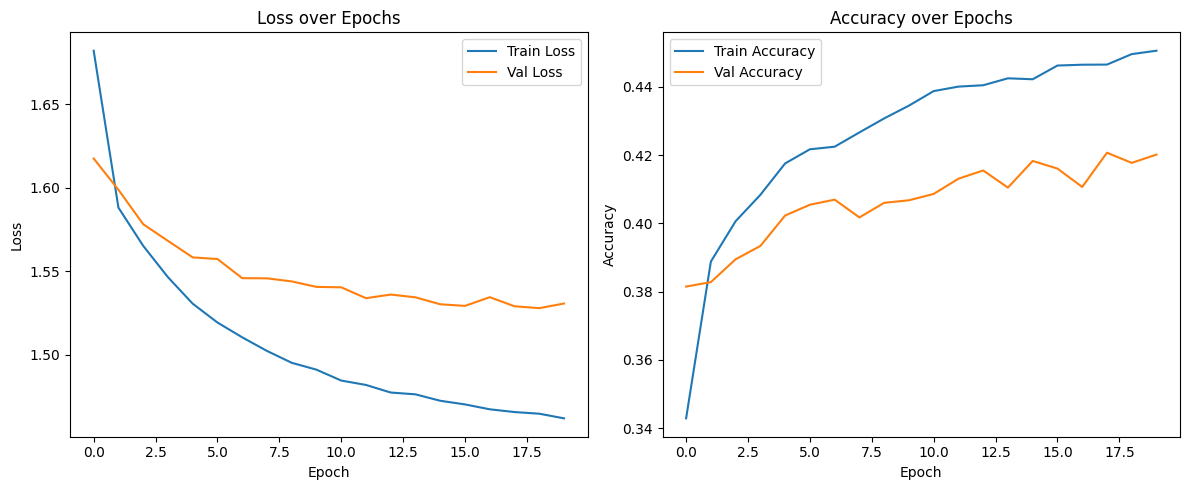

In [70]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = MLPModel(input_dim=input_dim, hidden_dim=128, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
train_and_evaluate_mlp(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)

### Accuracy Score

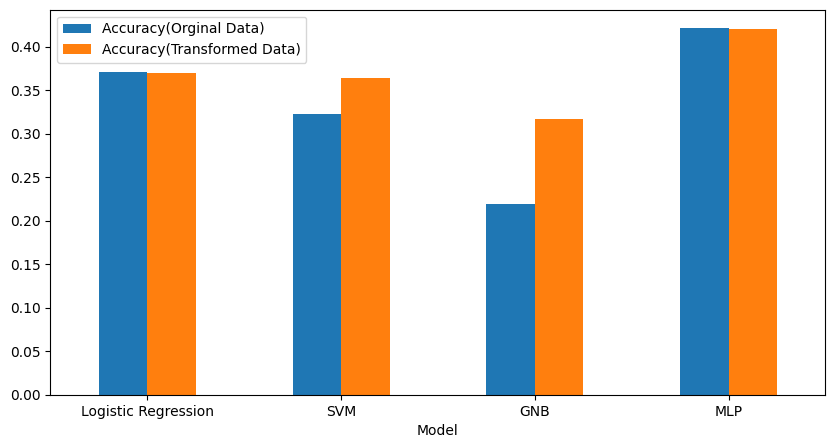

In [71]:
## visualize the confusion matrices and classification reports here
data = [["Logistic Regression", original_logistic_accuracy, accuracy_logistic],
        ["SVM", original_svm_accuracy, accuracy_svm],
        ["GNB", original_gnb_accuracy, accuracy_gnb],
        ["MLP", original_mlp_accuracy, accuracy_mlp]]
 
# Form DataFrame from data
df = pd.DataFrame(data, columns=["Model", "Accuracy(Orginal Data)", "Accuracy(Transformed Data)"])
 
# Plot unstacked multiple columns such as population and year from DataFrame
df.plot(x="Model", y=["Accuracy(Orginal Data)", "Accuracy(Transformed Data)"],
        kind="bar", figsize=(10, 5))
plt.xticks(rotation=360)
 
# Display plot
plt.show()

After plotting the scores, here is what we observed:

1. Logistic Regression: The logistic regression model has similar accuracy scores for both the original and transformed data. This indicates that logistic regression is relatively robust to the transformation applied by PCA, though it doesn't show significant improvement.

2. Support Vector Machine (SVM): The SVM model performs better with the PCA-transformed data, showing an improvement in accuracy. PCA likely helps in reducing the dimensionality and noise, allowing SVM to find a better decision boundary in the transformed feature space.

3. Gaussian Naive Bayes (GNB): Similar to SVM, the GNB model also shows better performance with the transformed data. This improvement could be due to the assumption of independence between features in GNB; PCA reduces feature interdependencies, leading to better classification performance.

4. Multi-Layer Perceptron (MLP):The MLP model has the highest accuracy among all models with both original and transformed data. This suggests that MLP is the most effective model for this dataset, capturing complex patterns and interactions in the data better than the other models. However, its accuracy is slightly higher with the original data, indicating that PCA transformation might not be as beneficial for neural networks which already excel at handling high-dimensional data.

While accuracy gives us a general sense of model performance, it is not sufficient, especially for imbalanced datasets. The class distribution in this dataset is imbalanced, meaning some classes have significantly more samples than others. Therefore, we need to look at additional metrics and tools, such as the confusion matrix and classification report to better understand model performance.

### Confusion Matrix

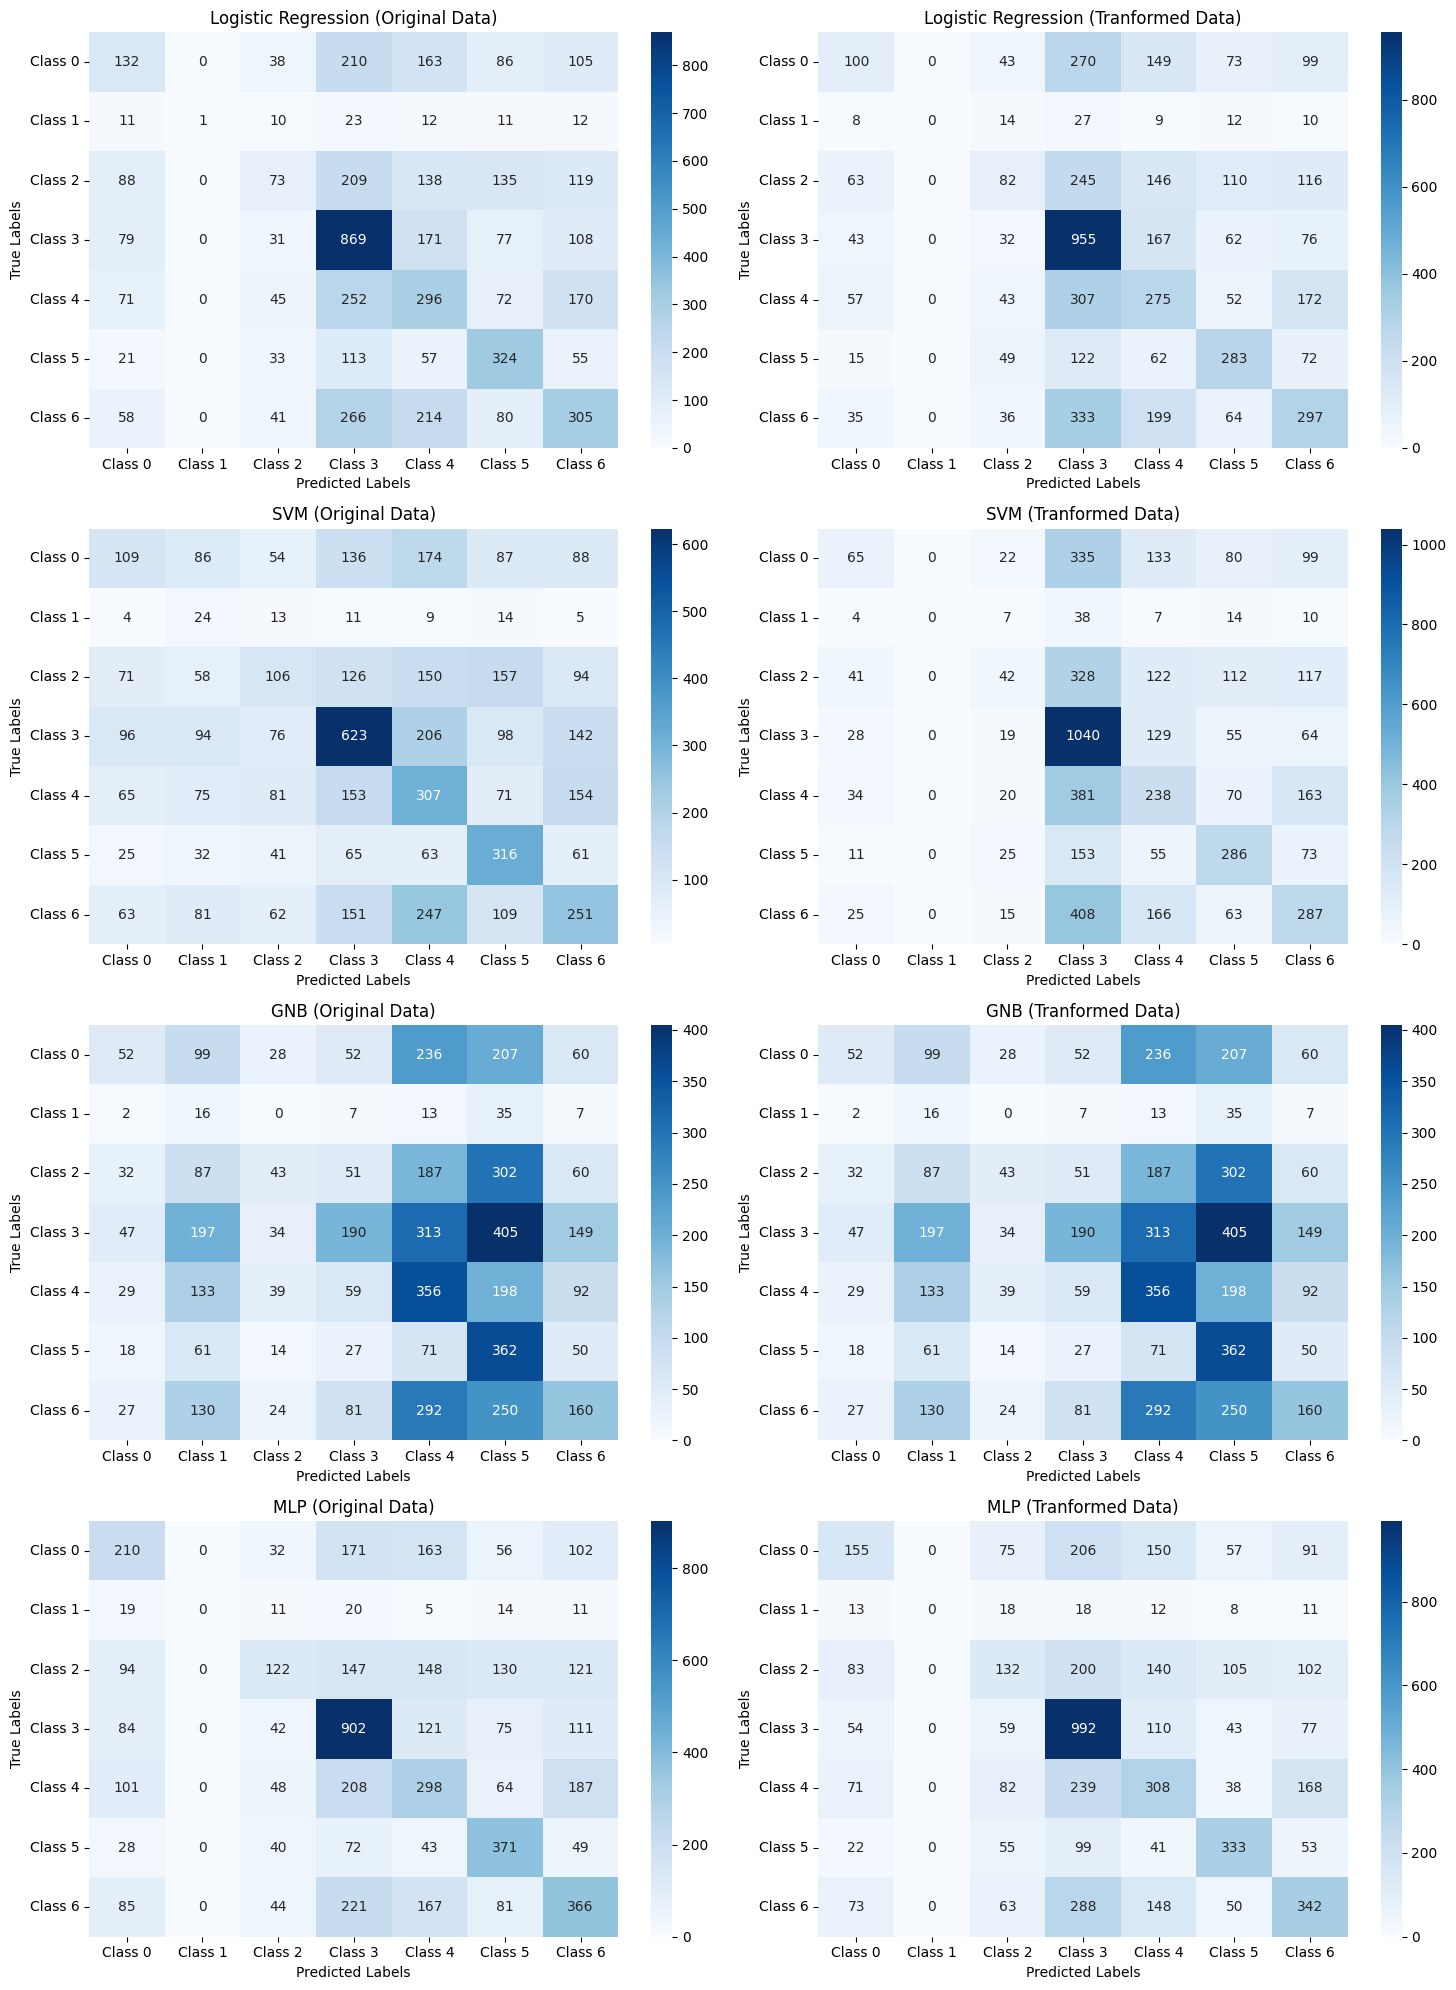

In [72]:
confusion_matrices = [
    (original_logistic_confusion, "Logistic Regression (Original Data)"),
    (confusion_logistic, "Logistic Regression (Tranformed Data)"),
    (original_svm_confusion, "SVM (Original Data)"),
    (confusion_svm, "SVM (Tranformed Data)"),
    (original_gnb_confusion, "GNB (Original Data)"),
    (confusion_gnb, "GNB (Tranformed Data)"),
    (original_mlp_confusion, "MLP (Original Data)"),
    (confusion_mlp, "MLP (Tranformed Data)")
]

class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  

axes = axes.flatten()

for i, (confusion_matrix, title) in enumerate(confusion_matrices):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    axes[i].set_title(title)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=0)


for j in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

Here is a brief summary of all the confusion matrices:

- Class 0: There are many misclassifications into Class 2, Class 3, Class 4, and Class 6.

- Class 1: This class has a very low number of instances correctly classified, contributing to the low precision and recall observed in the classification report.

- Class 3: This class has the highest number of correctly classified instances (992).

- Misclassifications are relatively spread out among other classes.

- Class 5: There are significant misclassifications into Class 2, Class 3, and Class 4, and Class 6.

Through the confusion matrix, we see that GNB has relatively weak performance and often misclassifies instances, whereas the MLP model works better overall. Although GNB can predict Class 1 (which MLP can't), this seems to be just random guessing rather than reliable classification. To better understand the model's performance, we move onto the next metrics.

### Classification report

#### Logistic regression

In [73]:
print("Classification report for logistic regression (orginal data):\n", 
      original_logistic_classre, 
      "\nClassification report for logistic regression (tranformed data):\n",
      classification_re_logistic)

Classification report for logistic regression (orginal data):
               precision    recall  f1-score   support

           0       0.29      0.18      0.22       734
           1       1.00      0.01      0.02        80
           2       0.27      0.10      0.14       762
           3       0.45      0.65      0.53      1335
           4       0.28      0.33      0.30       906
           5       0.41      0.54      0.47       603
           6       0.35      0.32      0.33       964

    accuracy                           0.37      5384
   macro avg       0.44      0.30      0.29      5384
weighted avg       0.36      0.37      0.34      5384
 
Classification report for logistic regression (tranformed data):
               precision    recall  f1-score   support

           0       0.31      0.14      0.19       734
           1       0.00      0.00      0.00        80
           2       0.27      0.11      0.15       762
           3       0.42      0.72      0.53      1335
  

#### SVM

In [74]:
print("Classification report for svm(orginal data):\n", 
      original_svm_classre, 
      "\nClassification report for svm (tranformed data):\n",
      classification_re_svm)

Classification report for svm(orginal data):
               precision    recall  f1-score   support

           0       0.25      0.15      0.19       734
           1       0.05      0.30      0.09        80
           2       0.24      0.14      0.18       762
           3       0.49      0.47      0.48      1335
           4       0.27      0.34      0.30       906
           5       0.37      0.52      0.43       603
           6       0.32      0.26      0.29       964

    accuracy                           0.32      5384
   macro avg       0.28      0.31      0.28      5384
weighted avg       0.33      0.32      0.32      5384
 
Classification report for svm (tranformed data):
               precision    recall  f1-score   support

           0       0.31      0.09      0.14       734
           1       0.00      0.00      0.00        80
           2       0.28      0.06      0.09       762
           3       0.39      0.78      0.52      1335
           4       0.28      0.26  

#### GNB

In [75]:
print("Classification report for GNB (orginal data):\n", 
      original_gnb_classre, 
      "\nClassification report for GNB (tranformed data):\n",
      classification_re_gnb)

Classification report for GNB (orginal data):
               precision    recall  f1-score   support

           0       0.25      0.07      0.11       734
           1       0.02      0.20      0.04        80
           2       0.24      0.06      0.09       762
           3       0.41      0.14      0.21      1335
           4       0.24      0.39      0.30       906
           5       0.21      0.60      0.31       603
           6       0.28      0.17      0.21       964

    accuracy                           0.22      5384
   macro avg       0.23      0.23      0.18      5384
weighted avg       0.28      0.22      0.20      5384
 
Classification report for GNB (tranformed data):
               precision    recall  f1-score   support

           0       0.31      0.11      0.16       734
           1       0.06      0.23      0.09        80
           2       0.23      0.10      0.14       762
           3       0.34      0.74      0.47      1335
           4       0.27      0.14 

#### MLP

In [76]:
print("Classification report for MLP (orginal data):\n", 
      original_mlp_classre, 
      "\nClassification report for MLP (tranformed data):\n",
      classification_re_mlp)

Classification report for MLP (orginal data):
               precision    recall  f1-score   support

           0       0.34      0.29      0.31       734
           1       0.00      0.00      0.00        80
           2       0.36      0.16      0.22       762
           3       0.52      0.68      0.59      1335
           4       0.32      0.33      0.32       906
           5       0.47      0.62      0.53       603
           6       0.39      0.38      0.38       964

    accuracy                           0.42      5384
   macro avg       0.34      0.35      0.34      5384
weighted avg       0.40      0.42      0.40      5384
 
Classification report for MLP (tranformed data):
               precision    recall  f1-score   support

           0       0.33      0.21      0.26       734
           1       0.00      0.00      0.00        80
           2       0.27      0.17      0.21       762
           3       0.49      0.74      0.59      1335
           4       0.34      0.34 

1. Performance: All models performs similarly on both the original and transformed datasets in terms of overall accuracy and weighted averages. However, there are slight differences in precision, recall, and F1-scores for individual classes.

2. Class Imbalance: All models struggle with class 1, indicating issues with imbalanced classes. Class 1 has 80 instances, which might be too few for the model to learn effectively.

3. Transformed Data: The transformed data shows slight improvements in recall for some classes (class 3) but a decrease in others.

### AUC Score (OvA)

The Area Under the ROC Curve (AUC-ROC) is a performance metric for classification problems at various threshold settings.

The AUC represents the degree or measure of separability, indicating how well the model distinguishes between classes. An AUC score of:

- 1.0: Perfect classifier
  
- 0.5: No discriminative power (equivalent to random guessing
  
- <0.5: Worse than random guessing

#### Logistic regression

In [77]:
print("AUC score for logistic regression")
print('{:<10} {:>20} {:>35}'.format('', 'Original Data', 'Transformed Data'))
print('=' * 70)
for cls in sorted(original_logistic_roc.keys()):
    auc_org = original_logistic_roc[cls]
    auc_trans = roc_auc_dict_logistic[cls]
    print('{:<10} {:>20} {:>35}'.format(f'Class {cls}', f'{auc_org:.6f}', f'{auc_trans:.6f}'))

AUC score for logistic regression
                  Original Data                    Transformed Data
Class 0                0.554649                            0.544356
Class 1                0.506250                            0.500000
Class 2                0.526481                            0.530331
Class 3                0.692966                            0.696650
Class 4                0.579054                            0.570033
Class 5                0.720445                            0.695651
Class 6                0.593829                            0.592394


#### SVM

In [78]:
print("AUC score for svm")
print('{:<10} {:>20} {:>35}'.format('', 'Original Data', 'Transformed Data'))
print('=' * 70)
for cls in sorted(original_svm_roc.keys()):
    auc_org = original_svm_roc[cls]
    auc_trans = roc_auc_dict_svm[cls]
    print('{:<10} {:>20} {:>35}'.format(f'Class {cls}', f'{auc_org:.6f}', f'{auc_trans:.6f}'))

AUC score for svm
                  Original Data                    Transformed Data
Class 0                0.539412                            0.528902
Class 1                0.609842                            0.500000
Class 2                0.534180                            0.515876
Class 3                0.654054                            0.686624
Class 4                0.574629                            0.563013
Class 5                0.705968                            0.695943
Class 6                0.568648                            0.589357


#### GNB

In [79]:
print("AUC score for gnb")
print('{:<10} {:>20} {:>35}'.format('', 'Original Data', 'Transformed Data'))
print('=' * 70)
for cls in sorted(original_gnb_roc.keys()):
    auc_org = original_gnb_roc[cls]
    auc_trans = roc_auc_dict_gnb[cls]
    print('{:<10} {:>20} {:>35}'.format(f'Class {cls}', f'{auc_org:.6f}', f'{auc_trans:.6f}'))

AUC score for gnb
                  Original Data                    Transformed Data
Class 0                0.518756                            0.535356
Class 1                0.533352                            0.585068
Class 2                0.513178                            0.522500
Class 3                0.536955                            0.635391
Class 4                0.572305                            0.532131
Class 5                0.654067                            0.618611
Class 6                0.535702                            0.571261


#### MLP

In [80]:
print("AUC score for mlp")
print('{:<10} {:>20} {:>35}'.format('', 'Original Data', 'Transformed Data'))
print('=' * 70)
for cls in sorted(original_mlp_roc.keys()):
    auc_org = original_mlp_roc[cls]
    auc_trans = roc_auc_dict_mlp[cls]
    print('{:<10} {:>20} {:>35}'.format(f'Class {cls}', f'{auc_org:.6f}', f'{auc_trans:.6f}'))

AUC score for mlp
                  Original Data                    Transformed Data
Class 0                0.598858                            0.571607
Class 1                0.500000                            0.500000
Class 2                0.556578                            0.548535
Class 3                0.734222                            0.741874
Class 4                0.592217                            0.602872
Class 5                0.763705                            0.744641
Class 6                0.624110                            0.620599


Here are some observations:

1. Logistic Regression: Performs slightly better on original data, with marginal decreases in AUC scores after transformation.

2. SVM: Shows mixed results, with some classes improving and others declining in performance after data transformation.

3. GNB: Benefits from transformed data in specific classes but sees reduced performance in others.

4. MLP: Consistently performs well with high AUC scores across most classes. Slight improvements with transformed data in some classes.

Given the class imbalance, these scores should be interpreted with caution. The high AUC scores for certain classes indicate good model performance, but the low AUC for class 1 suggests challenges in accurately predicting this class.

### Conclusion

1. Based on the evaluation of logistic regression, SVM, GNB, and MLP models using both original and transformed (PCA) data, here are the key takeaways:

- Logistic Regression: Performs marginally better on the original data compared to transformed data. The AUC scores show consistent performance across most classes, with slight decreases after transformation.

- Support Vector Machine (SVM): Shows mixed results with some classes improving and others declining in performance after PCA transformation. Overall, SVM benefits from PCA in terms of accuracy.

- Gaussian Naive Bayes (GNB): Benefits from PCA in specific classes but sees reduced performance in others. The AUC scores reflect improvements in certain classes but also variability across different categories.

- Multi-Layer Perceptron (MLP): Demonstrates strong performance across most classes with both original and transformed data. The AUC scores consistently indicate higher discriminative power, particularly in distinguishing between classes 3, 5, and 6.

2. Key Observations:

- Class Imbalance: All models struggle with class 1 due to its low number of instances, resulting in poor precision and recall for this class.

- Transformed Data: PCA transformation generally helps in improving or maintaining model performance in terms of accuracy and AUC scores for SVM and GNB, while MLP and Logistic Regression shows minimal variation.

- Model Performance: MLP consistently outperforms other models in terms of overall accuracy and AUC scores, indicating its effectiveness in capturing complex patterns in the data.

- Misclassifications: The confusion matrices reveal that all models have challenges correctly predicting certain classes, often misclassifying into nearby classes.

3. Recommendations:

- Further Evaluation of Class 1: Given its critical role and poor performance across all models, consider strategies to either augment data for class 1 or explore techniques like class weighting or resampling.

- Model Selection: MLP comes out as the top-performing model for this dataset, showcasing its ability to handle complex relationships and high-dimensional data effectively. Consider focusing on further optimizing MLP or exploring more sophisticated neural network architectures.

- Feature Engineering: While PCA transformation benefits SVM and GNB, further feature engineering tailored to each model could potentially enhance overall performance.

In conclusion, while all models show varying degrees of performance on this dataset, MLP stands out as the most effective model overall.